# Investigating TMDb Movie Dataset

##### Grab your popcorn and tickets as we dive into the data of movies  ranging from the year 1960 through the year 2015, for amazing discoveries and insights into the movie world during this time frame.

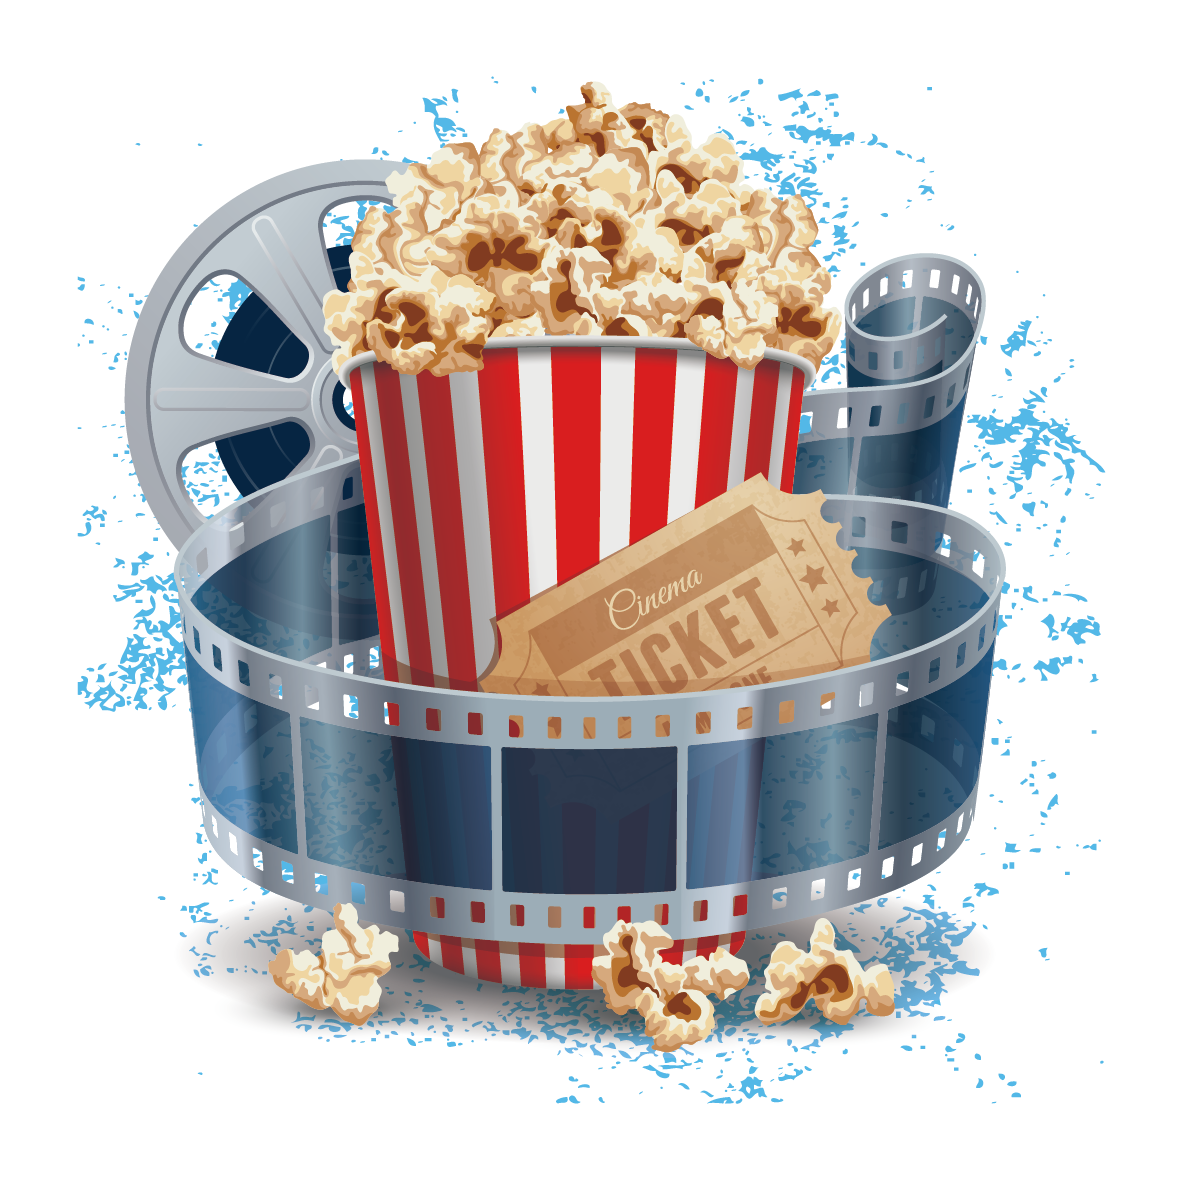

In [1]:
from IPython.display import Image
Image(r"C:\Users\Kizito\Downloads\pngwing.com.png")

## **Table Of Contents**

<ul>
<li><a href="#intro">Introduction</a></li>  
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploring and Visualizing the data</a></li>
<li><a href="#conclusions">Conclusion and Recommendations</a></li>
    
</ul>

<a id='intro'></a>
#  Introduction   

I presume at this stage we already have our popcorn and tickets for this fun-filled data ride. Analysing a movie dataset is really a captivating and intriguing one, because a movie 'is a work of visual art that simulates experiences and otherwise communicates ideas, stories, perceptions, feelings, beauty, or atmosphere through the use of moving images. [(Wikipedia)](https://en.wikipedia.org/wiki/Film). So, with this data we aim at providing key facts about the movie world and also trends and behaviours behind successful and profitable movies.

Like every work of art it requires the viewers or audience to appreciate it, as art belongs as much to the audience that interacts with it as it does to the artist who creates it. With the aid of this data we would be able to come to a realization of how much movies has been appreciated through the years and decades, and how the audience, actors, directors and production companies have all played an integral part in the growth of the movie industry over the years.

To achieve our aim of this project, through the course of our analysis we would be going through different stages, **firstly**, we would be wrangling our data, at this stage we aim at cleaning the data and also checking out the quality of the data. This stage would see us drop some irrelevant columns and also create new columns that would aid our analysis. Checking of datatypes, null values and also duplicates are also assessed at this stage and corrected.  **Secondly**, exploring our data and visualization. at this stage we explore our data to get useful informations and trends, for our movie lovers and also movie crew and actors, and with the help of deaborn and matplotlib we visualize some of the trends for better analysis and understanding. 
    Some questions at this stage which helped in getting us through this stage are: 
    **what are the most expensive movies by budget? 
    Most Successful movies  by profit?  
    Most Successful movies by percentage change budget and profit? and; 
    Movies that made complete lost?  
    Directors with most movies?  
    Directors to look out for in popular movie genres?  
    Actor with most movies overall and also by every decade?** 
    These questions and many more kept the entertainment going during the analysis. **Thirdly**, We arrive at our conclusion, at this stage we draw our curtain to this analysis and take our final bow, and also give out recommendations derived with our analysis to movie viewers, actors, directors and production companies, which would be a useful asset in the movie world. 

**NOW LETS GET STARTED!!!**

#### Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

import matplotlib.gridspec as gridspec

#### Reading in our dataset

In [3]:
df = pd.read_csv(r'C:\Users\Kizito\Downloads\tmdb-movies.csv')

df.head(1)  # Viewing the first row of our dataset

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='wrangling'></a>
# Data Wrangling

#### Number of rows and columns

In [4]:
r_c = df.shape
print(f'The dataset has {r_c[0]} rows and {r_c[1]} columns')

The dataset has 10866 rows and 21 columns


#### List of all available columns in the dataset

In [5]:
print('The following columns are available in the dataset now:')
for column in df.columns.tolist():
    print(column)
    


The following columns are available in the dataset now:
id
imdb_id
popularity
budget
revenue
original_title
cast
homepage
director
tagline
keywords
overview
runtime
genres
production_companies
release_date
vote_count
vote_average
release_year
budget_adj
revenue_adj


#### Dropping all  unnecessary columns

In [6]:
df.drop(['id','imdb_id','runtime','tagline',
        'keywords','overview','homepage',
        'budget_adj','revenue_adj', 'vote_count'],axis=1, inplace = True)

#### Checking the column information for all available columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   release_date          10866 non-null  object 
 9   vote_average          10866 non-null  float64
 10  release_year          10866 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 933.9+ KB


#### Updating the datatypes of columns with wrong datatypes

In [8]:
print(f'The release_date column is currently an "{df.release_date.dtype}" datatype. So, we need to change it into a "datetime" datetype.')

The release_date column is currently an "object" datatype. So, we need to change it into a "datetime" datetype.


In [9]:
df['release_date'] = pd.to_datetime(df['release_date'])    #Updating the datetime column datatype

In [10]:
print(f'The release date column is now a "{df.release_date.dtype}" datatype. So, the change is successful!')

The release date column is now a "datetime64[ns]" datatype. So, the change is successful!


#### Now we would be creating new columns off our existing columns

**month** = We would be adding a separate column for month only, as this would help in grouping all 
        available movies by month, so as to check out the most preferred month to release a movie, 
        the month with most movie release and the month that's most advisable to release a high 
        budget movie.
        

**profit** = The profit column would aid us in accessing all movies based on how much the movies made, after deducting the movie budget from the revenue. So, with the help of this column we would be able to rank movies based on how much profit was made from the movie.

**%profit** = Creating a percentage profit column would help us in grading the percentage difference of the profit made from movies. This particular column is very unique as it would give us proper insight on how successful a movie is/was based on the profit and budget. As most movies with high budget have a tendency of having high profit, even if that is not 100% certain. But this column would aid further into the profit of low budget movies also. So this column, is not just about high profits, but the percentage increase or decrease of the profit based on the movie budget.

**decade** = A decade column would be created from the release_year column. From the decade column we would be exploring the popularity of directors, casts and genres accross all decades


#### Creating the month column and dropping the date column

In [11]:
month = df['release_date'].dt.month

df.insert(11, 'release_month', month)

df.drop('release_date',axis=1, inplace = True)   #dropping the date column as it is now irrelevant

#### Creating the profit column

In [12]:
profit = df['revenue'] - df['budget']

df.insert(3, 'profit', profit)

#### Creating the percentage profit column

In [13]:
percent_profit = df[['budget','revenue']].pct_change(axis=1)['revenue']

df.insert(4, '%profit', percent_profit)

#### Creating the decade column

In [14]:
df['decade'] = df.release_year // 10 * 10

#### Checking out the list of all columns again

In [15]:
print('The following columns are available in the dataset now:')
for column in df.columns.tolist():
    print(column)

The following columns are available in the dataset now:
popularity
budget
revenue
profit
%profit
original_title
cast
director
genres
production_companies
vote_average
release_year
release_month
decade


#### Rearranging the dataset columns to our prefferred way

In [16]:
df = df[['original_title', 'genres', 'cast', 'director', 'production_companies', 
     'budget', 'revenue', 'profit','%profit', 'popularity', 'vote_average',
       'release_month', 'release_year', 'decade']]

#### Renaming of columns

In [17]:
df.rename(columns={'original_title':'title'}, inplace=True)

df.head(1)  

,title,genres,cast,director,production_companies,budget,revenue,profit,%profit,popularity,vote_average,release_month,release_year,decade
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,150000000,1513528810,1363528810,9.090192,32.985763,6.5,6,2015,2010


### Checking for null values in the dataset

In [18]:
a = df.isnull().sum()
print(f'The following columns: {a[a.values>0].index.tolist()} have missing values as listed below:')
a[a.values>0]

The following columns: ['genres', 'cast', 'director', 'production_companies', '%profit'] have missing values as listed below:


genres                    23
cast                      76
director                  44
production_companies    1030
%profit                 4701
dtype: int64

#### Dropping all null values

In [19]:
df.dropna(inplace = True)

#### Confirming there are no null rows in the dataset

In [20]:
df.isnull().sum()

title                   0
genres                  0
cast                    0
director                0
production_companies    0
budget                  0
revenue                 0
profit                  0
%profit                 0
popularity              0
vote_average            0
release_month           0
release_year            0
decade                  0
dtype: int64

### We would be checking for duplicates in our dataset

#### Checking for duplicated rows

In [21]:
print(f'The below rows are exactly the same thing, i.e duplicates. So, we would be dropping one of the rows from  our dataset' )

df[df.duplicated(keep = False)]

The below rows are exactly the same thing, i.e duplicates. So, we would be dropping one of the rows from  our dataset


,title,genres,cast,director,production_companies,budget,revenue,profit,%profit,popularity,vote_average,release_month,release_year,decade
2089,TEKKEN,Crime|Drama|Action|Thriller|Science Fiction,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Namco|Light Song Films,30000000,967000,-29033000,-0.967767,0.59643,5.0,3,2010,2010
2090,TEKKEN,Crime|Drama|Action|Thriller|Science Fiction,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Namco|Light Song Films,30000000,967000,-29033000,-0.967767,0.59643,5.0,3,2010,2010


#### Dropping duplicates from our dataset

In [22]:
df.drop_duplicates(inplace = True)

#### Confirming that there are no duplicates

In [23]:
df[df.duplicated(keep = False)]

,title,genres,cast,director,production_companies,budget,revenue,profit,%profit,popularity,vote_average,release_month,release_year,decade


### We would be checking Outliers from our dataset

###### By using scatterplot we visualize our budget for outliers

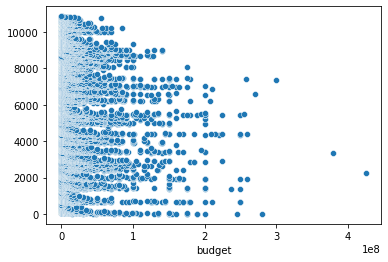

In [24]:
sns.scatterplot(x='budget', y= df.index, data = df)

plt.show()

From the scatter plot above we can deduce two set of outliers, one is two movies having a very high budget away from other movies.
While the other are movies on a zero budget

##### Overview of the movies with the highest budget

In [25]:
df.sort_values('budget', ascending=False).head(2)

,title,genres,cast,director,production_companies,budget,revenue,profit,%profit,popularity,vote_average,release_month,release_year,decade
2244,The Warrior's Way,Adventure|Fantasy|Action|Western|Thriller,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,Boram Entertainment Inc.,425000000,11087569,-413912431,-0.973912,0.25054,6.4,12,2010,2010
3375,Pirates of the Caribbean: On Stranger Tides,Adventure|Action|Fantasy,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,Walt Disney Pictures|Jerry Bruckheimer Films|M...,380000000,1021683000,641683000,1.688639,4.95513,6.3,5,2011,2010


Our scatter plot detects these two movies above, have the highest budgets far above other movies. So, with the help of wikipedia we were able to confirm the budget of [Pirates of the Caribbean: On Stranger Tide](https://en.wikipedia.org/wiki/Pirates_of_the_Caribbean:_On_Stranger_Tides) to be accurate as it is the most expensive movieof all time. But a look on the budget of the movie [The Warrior's Way](https://en.wikipedia.org/wiki/The_Warrior%27s_Way) it is no way close to the budget given to it on this dataset, as it is far below that. Wikipedia reports a budget of 42 million, while our data reports a budget of 425 million. With thiswe can see that this is an outlier and we can also easily fix it, as it seems there's one zero more than needed in the movie budget in our dataset.

#####  Fixing 'The Warrior's Way' budget in our dataset

In [26]:
df.loc[2244, 'budget'] = 42500000 

####  Confirming the top two most expensive movies again

In [27]:
df.sort_values('budget', ascending=False).head(2)

,title,genres,cast,director,production_companies,budget,revenue,profit,%profit,popularity,vote_average,release_month,release_year,decade
3375,Pirates of the Caribbean: On Stranger Tides,Adventure|Action|Fantasy,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,Walt Disney Pictures|Jerry Bruckheimer Films|M...,380000000,1021683000,641683000,1.688639,4.955130,6.3,5,2011,2010
7387,Pirates of the Caribbean: At World's End,Adventure|Fantasy|Action,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,Walt Disney Pictures|Jerry Bruckheimer Films|S...,300000000,961000000,661000000,2.203333,4.965391,6.8,5,2007,2000


From the above we can see that 'The Warrior's Way' is out of the most expensive movie andwe did this without dropping it from our dataset but replacing it with it actual budget. What's the actual budget The Warrior's Way now?

######  The new budget of the movie in our dataset

In [28]:
df.loc[2244][['title','budget']]

title     The Warrior's Way
budget             42500000
Name: 2244, dtype: object

#### Movies with 1000 or less budget

In [29]:
null_budget = df[df['budget'] <= 1000]
print(f'We have {null_budget.shape[0]} movies in the dataset with 1000 or less in budget, which we would be treating as outliers.')

We have 997 movies in the dataset with 1000 or less in budget, which we would be treating as outliers.


#### overview of movies with invalid budget

In [30]:
df[df.index.isin(null_budget.index)].head(4)

,title,genres,cast,director,production_companies,budget,revenue,profit,%profit,popularity,vote_average,release_month,release_year,decade
30,Mr. Holmes,Mystery|Drama,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,BBC Films|See-Saw Films|FilmNation Entertainme...,0,29355203,29355203,inf,3.927333,6.4,6,2015,2010
36,Solace,Crime|Drama|Mystery,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,Eden Rock Media|FilmNation Entertainment|Flynn...,0,22354572,22354572,inf,3.358321,6.2,9,2015,2010
72,Beyond the Reach,Thriller,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,Furthur Films,0,45895,45895,inf,2.272044,5.5,4,2015,2010
88,Equals,Drama|Romance|Science Fiction,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,Drake Doremus,Scott Free Productions|Infinite Frameworks Stu...,0,2000000,2000000,inf,1.959765,5.6,9,2015,2010


#### Dropping budget outliers

In [31]:
df = df[~df.index.isin(null_budget.index)]

####  Confirming budget outliers has been dropped

In [32]:
df[df.index.isin(null_budget.index)]

,title,genres,cast,director,production_companies,budget,revenue,profit,%profit,popularity,vote_average,release_month,release_year,decade


#### By using scatterplot we visualize our revenue for outliers

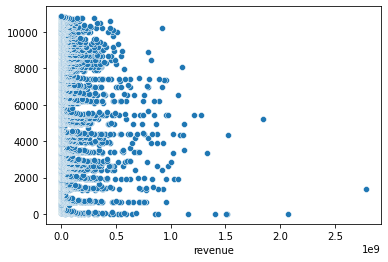

In [33]:
sns.scatterplot(x='revenue', y= df.index, data = df)

plt.show()

We have movies on the dataset with zero revenues, so we would be dropping them from the dataset, and we would be checking other credible sources to validate the top 3 highest revenue, as they seem to be far away from others.

##### Overview of the top 3 movies with the highest revenue

In [34]:
df.sort_values('revenue', ascending=False).head(3)

,title,genres,cast,director,production_companies,budget,revenue,profit,%profit,popularity,vote_average,release_month,release_year,decade
1386,Avatar,Action|Adventure|Fantasy|Science Fiction,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Ingenious Film Partners|Twentieth Century Fox ...,237000000,2781505847,2544505847,10.736312,9.432768,7.1,12,2009,2000
3,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot,200000000,2068178225,1868178225,9.340891,11.173104,7.5,12,2015,2010
5231,Titanic,Drama|Romance|Thriller,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Paramount Pictures|Twentieth Century Fox Film ...,200000000,1845034188,1645034188,8.225171,4.355219,7.3,11,1997,1990


For clarity and quality of our data, we took a quick look at the top grossing movies of all time provided by [wikipedia](https://en.wikipedia.org/wiki/List_of_highest-grossing_films#:~:text=Highest-grossing%20films%20%20%20%20Rank%20%20,%20%202015%20%2029%20more%20rows%20), and it clearly confirms that the revenue accrued by these movies are accurate. 

#### Movies with 1000 or less revenue

In [35]:
null_revenue = df[df['revenue'] <= 1000]
print(f'We have {null_revenue.shape[0]} movies in the dataset with 1000 or less in revenue, which we would be treating as outliers.')

We have 1197 movies in the dataset with 1000 or less in revenue, which we would be treating as outliers.


#### overview of movies with invalid revenue

In [36]:
df[df.index.isin(null_revenue.index)].head(4)

,title,genres,cast,director,production_companies,budget,revenue,profit,%profit,popularity,vote_average,release_month,release_year,decade
48,Wild Card,Thriller|Crime|Drama,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,Current Entertainment|Lionsgate|Sierra / Affin...,30000000,0,-30000000,-1.0,2.932340,5.3,1,2015,2010
67,Survivor,Crime|Thriller|Action,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,Nu Image Films|Winkler Films|Millennium Films|...,20000000,0,-20000000,-1.0,2.331636,5.4,5,2015,2010
93,Vice,Thriller|Science Fiction|Action|Adventure,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,Brian A Miller,Grindstone Entertainment Group|K5 Internationa...,10000000,0,-10000000,-1.0,1.872696,4.1,1,2015,2010
133,Louder Than Bombs,Drama,Gabriel Byrne|Isabelle Huppert|Jesse Eisenberg...,Joachim Trier,Motlys|Arte France CinÃ©ma|Animal Kingdom,11000000,0,-11000000,-1.0,1.251681,6.3,5,2015,2010


#### Dropping revenue outliers

In [37]:
df = df[~df.index.isin(null_revenue.index)]

#### Confirming budget outliers has been dropped

In [38]:
df[df.index.isin(null_revenue.index)]

,title,genres,cast,director,production_companies,budget,revenue,profit,%profit,popularity,vote_average,release_month,release_year,decade


### Overview our dataset after wrangling

##### Dataset rows and columns

In [39]:
print(f'The dataset now has {df.shape[0]} rows and {df.shape[1]} columns, as against the initial {r_c[0]} rows and {r_c[1]} columns')

The dataset now has 3772 rows and 14 columns, as against the initial 10866 rows and 21 columns


From the above information we can see that we have lost more than half of our dataset. To some, dropping off so many rows based on missing values is not really feasible, but in this case, there was less we could do about the missing values. Budget and revenue are integral parts of our analysis and if a movie falls short of that information in the dataset, then they are of no use basically to our analysis, as failure to dropping those rows will definitely skew our data.

##### Dataset list of columns

In [40]:
print('The following columns are available in the dataset now:')
for column in df.columns.tolist():
    print(column)

The following columns are available in the dataset now:
title
genres
cast
director
production_companies
budget
revenue
profit
%profit
popularity
vote_average
release_month
release_year
decade


#####  Dataset column datatypes

In [41]:
df.dtypes

title                    object
genres                   object
cast                     object
director                 object
production_companies     object
budget                    int64
revenue                   int64
profit                    int64
%profit                 float64
popularity              float64
vote_average            float64
release_month             int64
release_year              int64
decade                    int64
dtype: object

Our dataset is now cleaned and ready for further anlysis and exploration. Through the process of wrangling over half of the dataset has been lost cause of poor quality of the data provided. So, in order to avoid skewed analysis we had to drop the rows and columns, either because of incompleted data, duplicated data, null rows, inaccurate information and irrelevat columns. Furthermore, through the process of wrangling we created four new columns that would be important in our analysis.

# Data Exploration and Visualization<a id='eda'></a>

## TOP 10 most expensive movies

In [42]:
#Getting all the budgets in our dataset sorted in descending order
b_10 = df['budget'].sort_values(ascending=False).reset_index(drop=True).head(30)

b_10 = b_10.unique()[9]  # Getting the 10th unique budget

In [43]:
# filtering all movies that are equal to the 10th unique budget or over and sorting in descending order

budg_10 = df[['title','budget']][df[['title','budget']]['budget'] >=
                       b_10].sort_values('budget',ascending=False).reset_index(drop=True)

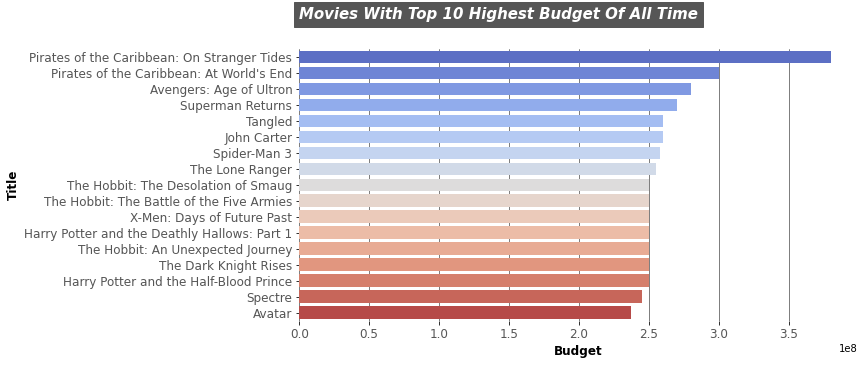

In [44]:
##Visualizing our result

fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='budget',y='title',data=budg_10,ci=95,ax=ax,orientation='horizontal',
           order = budg_10.sort_values('budget',  ascending = False).title, palette = 'coolwarm')
ax.set_title('Movies With Top 10 Highest Budget Of All Time',backgroundcolor ='#565656',
 fontsize=15, weight='bold',color='white',style='italic',loc='left',pad=30)


plt.box(False)
ax.xaxis.grid(linewidth=0.5,color='black')
ax.set_axisbelow(True)


ax.set_xlabel('Budget',weight='bold',size=12)
ax.set_ylabel('Title',weight='bold',size=12)


plt.xticks(rotation=0,color='#565656', size = 12)
plt.yticks(color='#565656', size = 12)

plt.show()


## TOP 10 highest grossing movies  

In [45]:
#Getting all the profits in our dataset sorted in descending order
t_10 = df['profit'].sort_values(ascending=False).reset_index(drop=True).head(10)

t_10 = t_10.unique()[9] # Getting the 10th unique profit

In [46]:
# filtering all movies that are equal to the 10th unique profit or over and sorting in descending order

pro_10 = df[['title','profit']][df[['title','profit']]['profit'] >= t_10].sort_values('profit',
                                                                                      ascending=False).reset_index(drop=True)

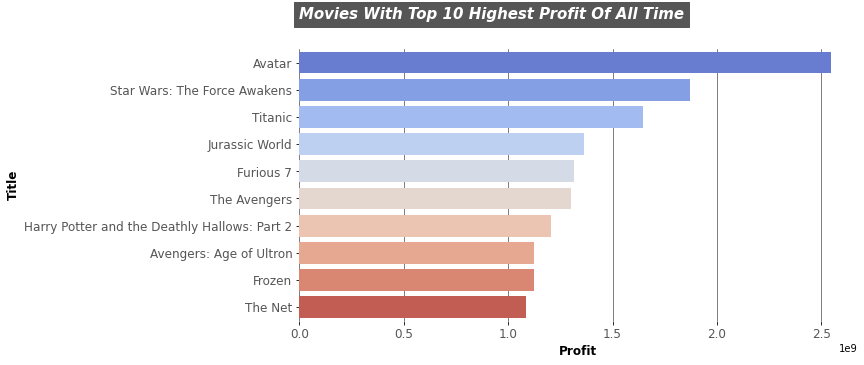

In [47]:
## Visualizing our result

fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='profit',y='title',data=pro_10,ci=95,ax=ax,orientation='horizontal',
           order = pro_10.sort_values('profit',  ascending = False).title, palette = 'coolwarm')
ax.set_title('Movies With Top 10 Highest Profit Of All Time',backgroundcolor ='#565656',
 fontsize=15, weight='bold',color='white',style='italic',loc='left',pad=30)


plt.box(False)
ax.xaxis.grid(linewidth=0.5,color='black')
ax.set_axisbelow(True)


ax.set_xlabel('Profit',weight='bold',size=12)
ax.set_ylabel('Title',weight='bold',size=12)


plt.xticks(rotation=0,color='#565656', size = 12)
plt.yticks(color='#565656', size = 12)

plt.show()


#### A function for adding value labels on a  Bar Chart

In [48]:
def labelx(rects):
    for rect in rects:
        # Get X and Y placement of label from rect.
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2

        # Number of points between bar and label.
        space = -55
        # Vertical alignment for positive values
        ha = 'left'

        
        # Use X value as label and format number with one decimal place
        label = "{:.1f}".format(x_value)

        # Create annotation
        if rects == ax1.patches:
            ax1.annotate(
                label,                      # Use `label` as label
                (x_value, y_value),         # Place label at end of the bar
                xytext=(space, 0),          # Horizontally shift label by `space`
                textcoords="offset points", # Interpret `xytext` as offset in points
                va='center',                # Vertically center label
                ha=ha)                      # Horizontally align label differently for
                                            # positive and negative values.
        elif rects == ax2.patches:
            ax2.annotate(
                label,                      # Use `label` as label
                (x_value, y_value),         # Place label at end of the bar
                xytext=(5, 0),          # Horizontally shift label by `space`
                textcoords="offset points", # Interpret `xytext` as offset in points
                va='center',                # Vertically center label
                ha=ha)                      # Horizontally align label differently for
                                            # positive and negative values.
                
                
        elif rects == ax11.patches:
            ax11.annotate(
                label,                      # Use `label` as label
                (x_value, y_value),         # Place label at end of the bar
                xytext=(-65, 0),          # Horizontally shift label by `space`
                textcoords="offset points", # Interpret `xytext` as offset in points
                va='center',                # Vertically center label
                ha=ha)                      # Horizontally align label differently for

                
        elif rects == ax22.patches:
            ax22.annotate(
                label,                      # Use `label` as label
                (x_value, y_value),         # Place label at end of the bar
                xytext=(7, 0),          # Horizontally shift label by `space`
                textcoords="offset points", # Interpret `xytext` as offset in points
                va='center',                # Vertically center label
                ha=ha)                      # Horizontally align label differently for
                                            # positive and negative values.

##  Absolute profit : Movies that made above 100% profit increase from their budget  

In [49]:
pp_100 = df[['title','budget','revenue',
    'profit','%profit']][df['%profit'] >
        100].sort_values('%profit',ascending = False).reset_index(drop=True)

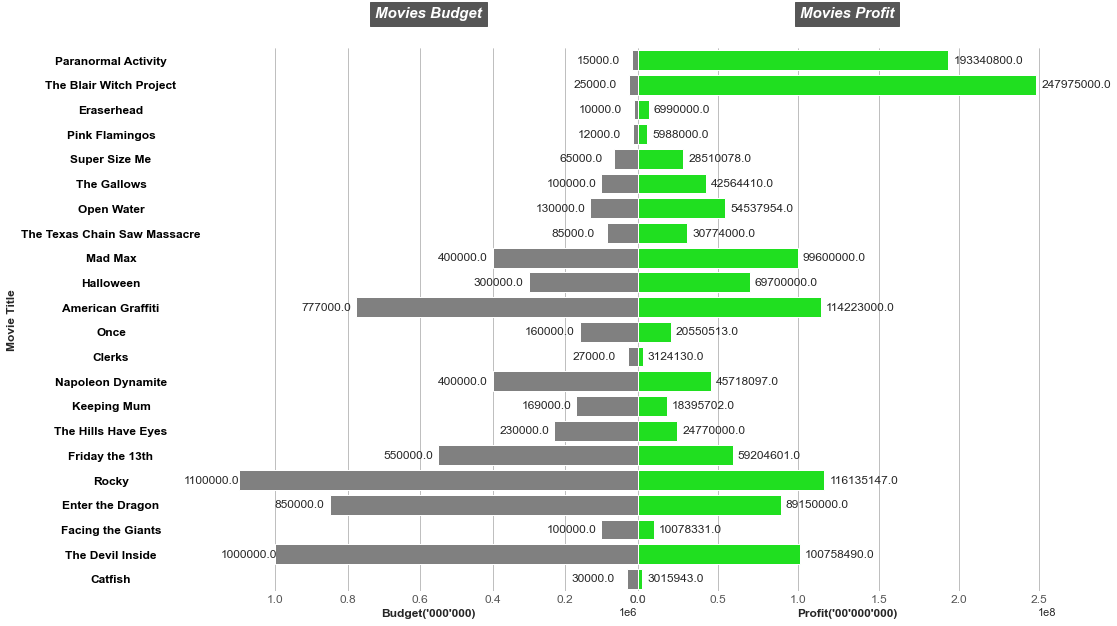

In [149]:
gs = gridspec.GridSpec(1, 2, wspace = 0,
                        hspace = 1)
fig = plt.figure(figsize=(15, 10))


# adding left bar chart and title
ax1 = fig.add_subplot(gs[0])
ax1 = sns.barplot(x='budget',y='title',data=pp_100,ci=95,ax=ax1,
                  orientation='horizontal', color = 'grey')
ax1.set_title('Movies Budget',backgroundcolor ='#565656',
 fontsize=15, weight='bold',color='white',style='italic',loc='center',pad=30)

# inverting the xaxis of the left bar chart
ax1.invert_xaxis()


# set tick positions and labels appropriately
ax1.tick_params(labelsize=10,length=0)
# remove the plot box
plt.box(False)
# add grid lines for y axis
ax1.xaxis.grid(linewidth=0.5,color='grey')

# setting the properties of the x and y ticks
plt.xticks(rotation=0,color='#565656', size = 12)  
plt.yticks(color='black', size = 12,weight='bold')

# positioning our ytick labels
ax1.set_yticklabels(pp_100['title'], 
                    ha='center', position=(-0.25, -1))

#Setting the x and y label 
ax1.set_ylabel('Movie Title',weight='bold',size=12)
ax1.set_xlabel('Budget(\'000\'000)',weight='bold',size=12)

# adding the value labels to the bars with the function created earlier on
labelx(ax1.patches)

#=-----------------------------------------------------------------------------------------------------------------------------#

# adding right bar chart and title
ax2 = fig.add_subplot(gs[1], sharey=ax1)
ax2 = sns.barplot(x='profit',y='title',data=pp_100,ci=95,ax=ax2,
                  orientation='horizontal', color = 'lime')
ax2.set_title('Movies Profit',backgroundcolor ='#565656',
 fontsize=15, weight='bold',color='white',style='italic',loc='center',pad=30)


# set tick positions and labels appropriately
ax2.tick_params(labelsize=10,length=0)
# remove the plot box
plt.box(False)
# add grid lines for y axis
ax2.xaxis.grid(linewidth=0.5,color='grey')

# setting the properties of the x ticks
plt.xticks(rotation=0,color='#565656', size = 12) 

# setting of the x and y label
ax2.set_ylabel('')
ax2.set_xlabel('Profit(\'00\'000\'000)',weight='bold',size=12)

# adding the value labels to the bars with the function created earlier on
labelx(ax2.patches)


# turn off the second axis tick labels without disturbing the originals
[lbl.set_visible(False) for lbl in ax2.get_yticklabels()]



plt.show()

##  Absolute loss : Movies that made below 1 % profit increase from their budget  

In [150]:
lp_20 = df[['title','budget','revenue','profit','%profit']][df['%profit'] <
       0].sort_values('%profit',ascending = True).reset_index(drop=True).head(20)

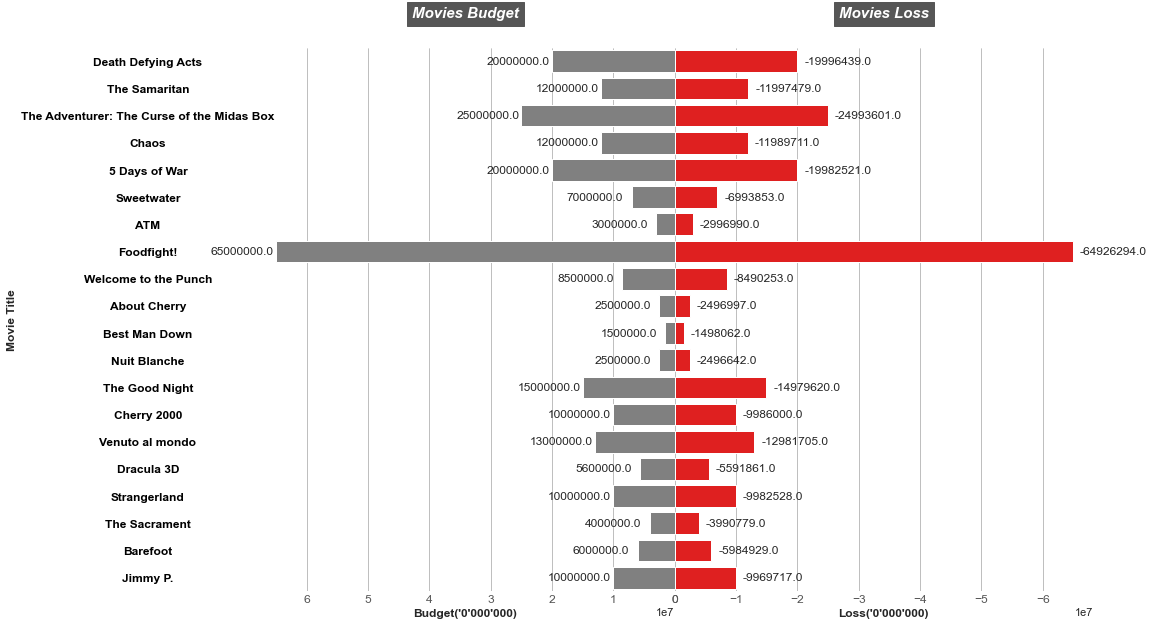

In [152]:
gs = gridspec.GridSpec(1, 2, wspace = 0,
                        hspace = 1)
fig = plt.figure(figsize=(15, 10))


# adding left bar chart and title
ax11 = fig.add_subplot(gs[0])
ax11 = sns.barplot(x='budget',y='title',data=lp_20,ci=95,ax=ax11,
                  orientation='horizontal', color = 'grey')
ax11.set_title('Movies Budget',backgroundcolor ='#565656',
 fontsize=15, weight='bold',color='white',style='italic',loc='center',pad=30)

# inverting the xaxis of the left bar chart
ax11.invert_xaxis()


# set tick positions and labels appropriately
ax11.tick_params(labelsize=10,length=0)
# remove the plot box
plt.box(False)
# add grid lines for y axis
ax11.xaxis.grid(linewidth=0.5,color='grey')

# setting the properties of the x and y ticks
plt.xticks(rotation=0,color='#565656', size = 12)  
plt.yticks(color='black', size = 12,weight='bold')

# positioning our ytick labels
ax11.set_yticklabels(lp_20['title'], 
                    ha='center', position=(-0.25, -1))

#Setting the x and y label 
ax11.set_ylabel('Movie Title',weight='bold',size=12)
ax11.set_xlabel('Budget(\'0\'000\'000)',weight='bold',size=12)

# adding the value labels to the bars with the function created earlier on
labelx(ax11.patches)

#=-----------------------------------------------------------------------------------------------------------------------------#

# adding right bar chart and title
ax22 = fig.add_subplot(gs[1], sharey=ax11)
ax22 = sns.barplot(x='profit',y='title',data=lp_20,ci=95,ax=ax22,
                  orientation='horizontal', color = 'red')
ax22.set_title('Movies Loss',backgroundcolor ='#565656',
 fontsize=15, weight='bold',color='white',style='italic',loc='center',pad=30)

# inverting the xaxis of the left bar chart
ax22.invert_xaxis()

# set tick positions and labels appropriately
ax22.tick_params(labelsize=10,length=0)
# remove the plot box
plt.box(False)
# add grid lines for y axis
ax22.xaxis.grid(linewidth=0.5,color='grey')

# setting the properties of the x ticks
plt.xticks(rotation=0,color='#565656', size = 12) 

# setting of the x and y label
ax22.set_ylabel('')
ax22.set_xlabel('Loss(\'0\'000\'000)',weight='bold',size=12)

# adding the value labels to the bars with the function created earlier on
labelx(ax22.patches)


# turn off the second axis tick labels without disturbing the originals
[lbl.set_visible(False) for lbl in ax22.get_yticklabels()]



plt.show()

## Top 15 directors with most movies    

In [165]:
directors = df['director'].value_counts().reset_index().rename(columns={'index':'director', 'director':'all_movie_count'})

directors.head(15)

,director,all_movie_count
0,Steven Spielberg,27
1,Clint Eastwood,24
2,Ridley Scott,21
3,Woody Allen,18
4,Martin Scorsese,17
5,Steven Soderbergh,17
6,Tim Burton,16
7,Robert Zemeckis,15
8,Renny Harlin,15
9,Brian De Palma,15


In [166]:
print('Steven Spielberg  happens to be the director with most number of movies, 27, below are his top 5 popular movies:')

df[df['director'] == 'Steven Spielberg'][['title','director',
        'release_year','popularity']].sort_values('popularity',ascending=False).reset_index(drop=True).head(5)

Steven Spielberg  happens to be the director with most number of movies, 27, below are his top 5 popular movies:


,title,director,release_year,popularity
0,Raiders of the Lost Ark,Steven Spielberg,1981,4.578300
1,Bridge of Spies,Steven Spielberg,2015,3.648210
2,Indiana Jones and the Last Crusade,Steven Spielberg,1989,3.536655
3,Indiana Jones and the Kingdom of the Crystal S...,Steven Spielberg,2008,3.161670
4,Catch Me If You Can,Steven Spielberg,2002,2.973115


## Top 10 directors with most  highest grossing movies 

In [167]:
# FGetting the 50th highest unique profit

t_50 = df['profit'].sort_values(ascending=False).reset_index(drop=True).head(50)

t_50 = t_50.unique()[49]

In [168]:
top = df[['director','title','profit']][df[['title','profit']]['profit'] >=
                                        t_50].sort_values('profit',
                                        ascending=False).reset_index(drop=True)

top = top['director'].value_counts().reset_index().rename(columns={'index':'director', 'director':'top_movie_count'}).head(10)


top.merge(directors)

,director,top_movie_count,all_movie_count
0,Peter Jackson,6,11
1,David Yates,4,4
2,George Lucas,3,6
3,Christopher Nolan,3,8
4,James Cameron,2,8
5,Chris Columbus,2,9
6,Gore Verbinski,2,9
7,Michael Bay,2,11
8,Steven Spielberg,2,27
9,Joss Whedon,2,3


In [169]:
print('Peter Jackson has the highest number of  top 50 grossing movies, with about 6 movies out of his 11 total movies making so much profit. Another notable mention here is David Yates. \nYates has directed 4 movies and all 4 of his movies has been at top 50 of highest grossing movies. \nNow we take a look at the list of these top movies directed by Jackson and Yates:')

print('\nFor Peter Jackson his top grossing movies are:')
df[df['director'] == 'Peter Jackson'][['title','director',
        'release_year','profit']].sort_values('profit',ascending=False).reset_index(drop=True).head(6)

Peter Jackson has the highest number of  top 50 grossing movies, with about 6 movies out of his 11 total movies making so much profit. Another notable mention here is David Yates. 
Yates has directed 4 movies and all 4 of his movies has been at top 50 of highest grossing movies. 
Now we take a look at the list of these top movies directed by Jackson and Yates:

For Peter Jackson his top grossing movies are:


,title,director,release_year,profit
0,The Lord of the Rings: The Return of the King,Peter Jackson,2003,1024888979
1,The Lord of the Rings: The Two Towers,Peter Jackson,2002,847287400
2,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,2001,778368364
3,The Hobbit: An Unexpected Journey,Peter Jackson,2012,767003568
4,The Hobbit: The Desolation of Smaug,Peter Jackson,2013,708400000
5,The Hobbit: The Battle of the Five Armies,Peter Jackson,2014,705119788


In [171]:
print('For David Yates his top grossing movies are:')
df[df['director'] == 'David Yates'][['title','director',
        'release_year','profit']].sort_values('profit',ascending=False).reset_index(drop=True).head(4)

For David Yates his top grossing movies are:


,title,director,release_year,profit
0,Harry Potter and the Deathly Hallows: Part 2,David Yates,2011,1202817822
1,Harry Potter and the Order of the Phoenix,David Yates,2007,788212738
2,Harry Potter and the Deathly Hallows: Part 1,David Yates,2010,704305868
3,Harry Potter and the Half-Blood Prince,David Yates,2009,683959197


## Top 5 directors in popular movie genres

In this section we would be looking at consistent directors in particular movie genres with overall average movie rating. By consistent directors we would be filtering out directors with 5 or more movies in that particular genre. By average, we would be fixing the average total average of every particular genre at a particular genre, based on the vote average of movies in that genre.

In [59]:
comedy = df[df['genres'].str.contains('Comedy')]
drama = df[df['genres'].str.contains('Drama')]
action = df[df['genres'].str.contains('Action')]
horror = df[df['genres'].str.contains('Horror')]
adventure = df[df['genres'].str.contains('Adventure')]
sci_fi = df[df['genres'].str.contains('Science Fiction')]

## Top directors to look out for in comedy movies

For comedy, we are aiming at directors with 5 or more movies and vote average of 6.5                           

In [60]:
three = round(comedy[['director','vote_average']].groupby(comedy['director']).agg({'director':'count',
                                                             'vote_average':'mean'}),2)

three = three.rename(columns={'director':'nbr_of_movies'}).reset_index()

three[(three['vote_average'] >= 6.5)&
     (three['nbr_of_movies'] >= 5)].sort_values('vote_average',ascending=False).reset_index(drop=True)

,director,nbr_of_movies,vote_average
0,Wes Anderson,7,7.31
1,Robert Zemeckis,7,7.00
2,Joel Coen,5,6.90
3,Woody Allen,15,6.69
4,Mel Brooks,6,6.63
5,Chris Columbus,6,6.52
6,Mike Nichols,5,6.52
7,Richard Donner,5,6.50


## Top directors to look out for in drama movies

For drama, we are aiming at directors with 5 or more movies and vote average of 7                           

In [61]:
three = round(drama[['director','vote_average']].groupby(drama['director']).agg({'director':'count',
                                                             'vote_average':'mean'}),2)

three = three.rename(columns={'director':'nbr_of_movies'}).reset_index()

three[(three['vote_average'] >= 7)&
     (three['nbr_of_movies'] >= 5)].sort_values('vote_average',ascending=False).reset_index(drop=True)

,director,nbr_of_movies,vote_average
0,Christopher Nolan,5,7.74
1,Stanley Kubrick,6,7.33
2,David Fincher,8,7.28
3,Wes Anderson,6,7.28
4,David Lynch,6,7.25
5,Martin Scorsese,16,7.22
6,Sidney Lumet,5,7.12
7,Roman Polanski,7,7.10
8,Richard Linklater,8,7.06
9,Tim Burton,6,7.03


## Top directors to look out for in action movies

For action, we are aiming at directors with 5 or more movies and vote average of 6.5                           

In [62]:
three = round(action[['director','vote_average']].groupby(action['director']).agg({'director':'count',
                                                             'vote_average':'mean'}),2)

three = three.rename(columns={'director':'nbr_of_movies'}).reset_index()

three[(three['vote_average'] >= 6.5)&
     (three['nbr_of_movies'] >= 5)].sort_values('vote_average',ascending=False).reset_index(drop=True)

,director,nbr_of_movies,vote_average
0,Peter Jackson,5,7.36
1,Quentin Tarantino,5,7.32
2,James Cameron,6,7.13
3,Paul Greengrass,5,6.98
4,Antoine Fuqua,7,6.77
5,Ron Howard,5,6.64
6,Zack Snyder,5,6.58
7,Tony Scott,11,6.57
8,Gore Verbinski,5,6.52
9,Steven Spielberg,10,6.52


## Top directors to look out for in sci_fi movies

For action, we are aiming at directors with 5 or more movies and vote average of 6

In [63]:
three = round(sci_fi[['director','vote_average']].groupby(action['director']).agg({'director':'count',
                                                             'vote_average':'mean'}),2)

three = three.rename(columns={'director':'nbr_of_movies'}).reset_index()

three[(three['vote_average'] >= 6)&
     (three['nbr_of_movies'] >= 5)].sort_values('vote_average',ascending=False).reset_index(drop=True)

,director,nbr_of_movies,vote_average
0,James Cameron,5,7.24
1,Michael Bay,6,6.23
2,Roland Emmerich,5,6.02


## Top directors to look out for in adventure movies

For action, we are aiming at directors with 5 or more movies and vote average of 6

In [65]:
three = round(adventure[['director','vote_average']].groupby(adventure['director']).agg({'director':'count',
                                                             'vote_average':'mean'}),2)

three = three.rename(columns={'director':'nbr_of_movies'}).reset_index()

three[(three['vote_average'] >= 6)&
     (three['nbr_of_movies'] >= 5)].sort_values('vote_average',ascending=False).reset_index(drop=True)

,director,nbr_of_movies,vote_average
0,Peter Jackson,7,7.36
1,Robert Zemeckis,7,6.96
2,Steven Spielberg,12,6.75
3,Gore Verbinski,5,6.68
4,Ridley Scott,8,6.61
5,Tim Burton,5,6.44
6,Guy Hamilton,5,6.40
7,Michael Bay,9,6.32
8,Richard Donner,10,6.28
9,Joe Johnston,6,6.20


## Top directors to look out for in horror movies

For action, we are aiming at directors with 5 or more movies and vote average of 5

In [67]:
three = round(horror[['director','vote_average']].groupby(horror['director']).agg({'director':'count',
                                                             'vote_average':'mean'}),2)

three = three.rename(columns={'director':'nbr_of_movies'}).reset_index()

three[(three['vote_average'] >= 5)&
     (three['nbr_of_movies'] >= 5)].sort_values('vote_average',ascending=False).reset_index(drop=True)

,director,nbr_of_movies,vote_average
0,David Cronenberg,6,6.65
1,John Carpenter,7,6.41
2,George A. Romero,8,5.90
3,Wes Craven,13,5.88
4,Renny Harlin,5,5.60
5,Eli Roth,5,5.24


## Actors with most movies over all and by decades

In [172]:
# creating a function to split every value in a particular column and count the unique values

def data(column):
    a = column.str.cat(sep='|')
    a = pd.Series(a.split('|'))
    count = a.value_counts(ascending=False)
    return count   

In [76]:
# creating a count dataframe for all actors

cast = data(df['cast']).head(14).reset_index().rename(columns={'index':'actor', 0:'movie_count'})

In [78]:
# filtering out all actors by decades

tw_10 = df[df['decade'] == 2010]
tw_00 = df[df['decade'] == 2000]
tw_90 = df[df['decade'] == 1990]
tw_80 = df[df['decade'] == 1980]
tw_70 = df[df['decade'] == 1970]
tw_60 = df[df['decade'] == 1960]

In [79]:
# creating a count dataframe for all actors in 2010's

tw_10 = data(tw_10['cast']).reset_index().rename(columns={'index':'actor', 0:'movie_count'}).head(10)

In [80]:
# creating a count dataframe for all actors in 2000's

tw_00 = data(tw_00['cast']).reset_index().rename(columns={'index':'actor', 0:'movie_count'}).head(10)

In [81]:
# creating a count dataframe for all actors in 1990's

tw_90 = data(tw_90['cast']).reset_index().rename(columns={'index':'actor', 0:'movie_count'}).head(10)

In [82]:
# creating a count dataframe for all actors in 1980's

tw_80 = data(tw_80['cast']).reset_index().rename(columns={'index':'actor', 0:'movie_count'}).head(10)

In [83]:
# creating a count dataframe for all actors in 1970's

tw_70 = data(tw_70['cast']).reset_index().rename(columns={'index':'actor', 0:'movie_count'}).head(10)

In [84]:
# creating a count dataframe for all actors in 1960's

tw_60 = data(tw_60['cast']).reset_index().rename(columns={'index':'actor', 0:'movie_count'}).head(10)

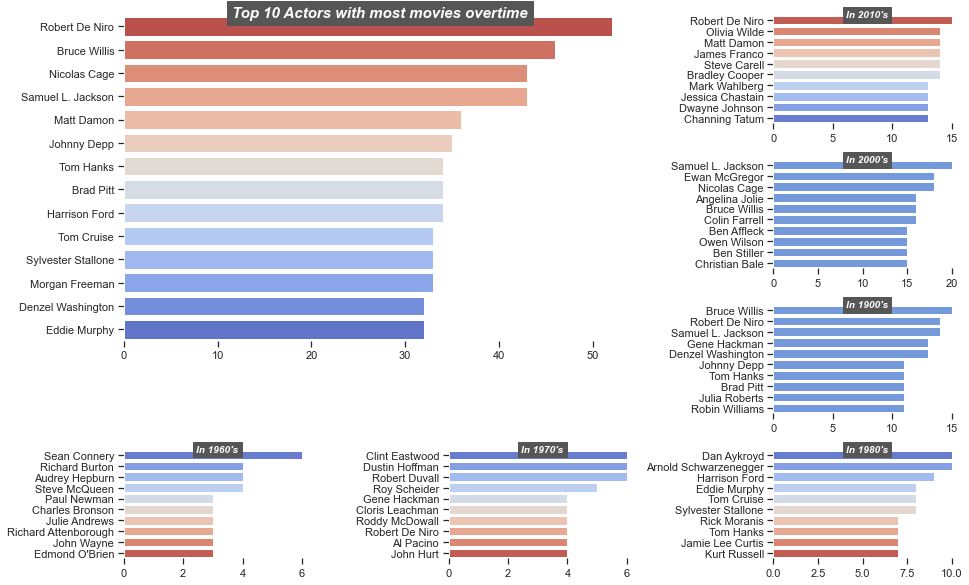

In [86]:
# Visualizing all top 10 actors by decades and overall



Grid_plot = plt.GridSpec(8, 6, wspace = 5.5,
                        hspace = 1)

fig,ax = plt.subplots(figsize=(15,10))

   
    
axes1 = plt.subplot(Grid_plot[:5,:4])
sns.barplot(cast["movie_count"],cast["actor"],ax=axes1,orientation='horizontal',
           order = cast.sort_values('movie_count',  ascending = False).actor, palette = 'coolwarm_r')
axes1.set_title('Top 10 Actors with most movies overtime',backgroundcolor ='#565656',
 fontsize=15, weight='bold',color='white',style='italic',loc='center',pad=30,y=0.9)
plt.box(False)
axes1.set_xlabel('')
axes1.set_ylabel('')

axes2 = plt.subplot(Grid_plot[0:2, 4:])
sns.barplot(tw_10["movie_count"],tw_10["actor"],ax=axes2,orientation='horizontal',
           order = tw_10.sort_values('movie_count',  ascending = False).actor, palette = 'coolwarm_r')
axes2.set_title('In 2010\'s',backgroundcolor ='#565656',
 fontsize=10, weight='bold',color='white',style='italic',loc='center',pad=30,y=0.7)
plt.box(False)
axes2.set_xlabel('')
axes2.set_ylabel('')

axes3 = plt.subplot(Grid_plot[2:4, 4:])
sns.barplot(tw_00["movie_count"],tw_00["actor"],ax=axes3,orientation='horizontal',
           order = tw_00.sort_values('movie_count',  ascending = False).actor, color = 'cornflowerblue')
axes3.set_title('In 2000\'s',backgroundcolor ='#565656',
 fontsize=10, weight='bold',color='white',style='italic',loc='center',pad=30,y=0.7)
plt.box(False)
axes3.set_xlabel('')
axes3.set_ylabel('')


axes4 = plt.subplot(Grid_plot[4:6, 4:])
sns.barplot(tw_90["movie_count"],tw_90["actor"],ax=axes4,orientation='horizontal',
           order = tw_90.sort_values('movie_count',  ascending = False).actor, color = 'cornflowerblue')
axes4.set_title('In 1900\'s',backgroundcolor ='#565656',
 fontsize=10, weight='bold',color='white',style='italic',loc='center',pad=30,y=0.7)
plt.box(False)
axes4.set_xlabel('')
axes4.set_ylabel('')


axes5 = plt.subplot(Grid_plot[6:8, 0:2])
sns.barplot(tw_60["movie_count"],tw_60["actor"],ax=axes5,orientation='horizontal',
           order = tw_60.sort_values('movie_count',  ascending = False).actor, palette = 'coolwarm')
axes5.set_title('In 1960\'s',backgroundcolor ='#565656',
 fontsize=10, weight='bold',color='white',style='italic',loc='center',pad=30,y=0.7)
plt.box(False)
axes5.set_xlabel('')
axes5.set_ylabel('')


axes6 = plt.subplot(Grid_plot[6:8, 2:4])
sns.barplot(tw_70["movie_count"],tw_70["actor"],ax=axes6,orientation='horizontal',
           order = tw_70.sort_values('movie_count',  ascending = False).actor, palette = 'coolwarm')
axes6.set_title('In 1970\'s',backgroundcolor ='#565656',
 fontsize=10, weight='bold',color='white',style='italic',loc='center',pad=30,y=0.7)
plt.box(False)
axes6.set_xlabel('')
axes6.set_ylabel('')


axes7 = plt.subplot(Grid_plot[6:8, 4:6])
sns.barplot(tw_80["movie_count"],tw_80["actor"],ax=axes7,orientation='horizontal',
           order = tw_80.sort_values('movie_count',  ascending = False).actor, palette = 'coolwarm')
axes7.set_title('In 1980\'s',backgroundcolor ='#565656',
 fontsize=10, weight='bold',color='white',style='italic',loc='center',pad=30,y=0.7)
plt.box(False)
axes7.set_xlabel('')
axes7.set_ylabel('')

plt.show()

From the above visualization we aimed at putting the overall count visualization and all decade visualizations into one, so that at a glimpse we can easily see the actor with most movies overtime and also in every decade.

As we can see **Roberto De Niro** has the highest number of movies overtime, and he also tops the chart with most movies in **2010's**, eight on the list in **1970's**, and second on the list in **1990's** behind **Bruce Willis**, who also has the second highest number of movies overall.

## The genres with most movies over all and by decades

In [104]:
a = data(df['genres']).reset_index().rename(columns={'index':'genres', 0:'movie_count'})

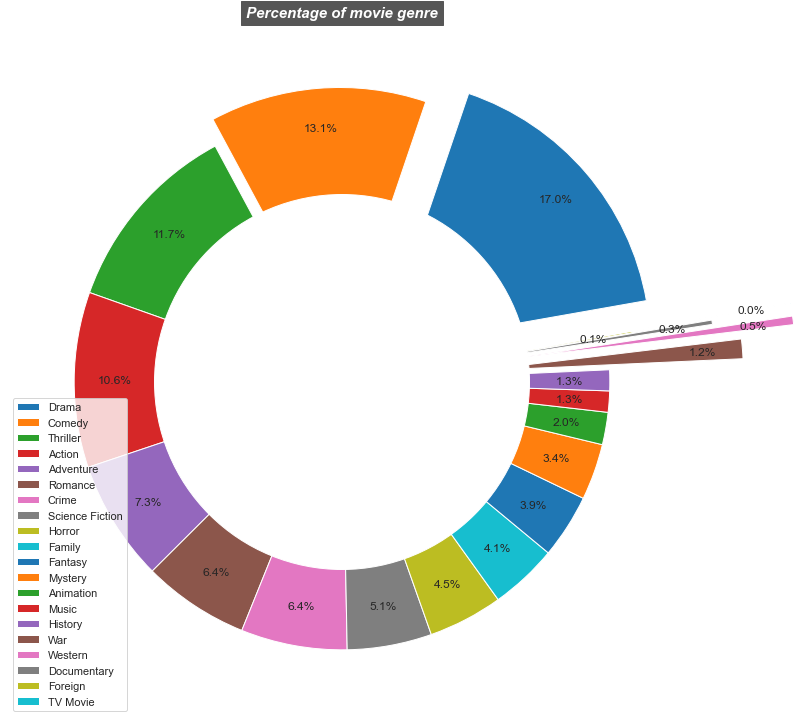

In [88]:
fig1, ax1 = plt.subplots(figsize=(12,25))
palette_color = sns.color_palette('tab10')


total = sum(a['movie_count'])
data_per = a['movie_count']/total*100
explode = (0.2, 0.1, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0.5, 0.7, 0.4, 0.1, 0.7)
ax1.pie(data_per, explode = explode,pctdistance=0.85,
    autopct='%1.1f%%', colors=palette_color,
    startangle=10,)
ax1.set_title('Percentage of movie genre',backgroundcolor ='#565656',
 fontsize=15, weight='bold',color='white',style='italic',loc='center',pad=30)



ax1.legend(loc=3, labels=a.genres)

circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

## Percentage of Top 100 profitable movies genres

In [105]:
tm_100 = df['profit'].sort_values(ascending=False).reset_index(drop=True).head(100)

tm_100 = tm_100.unique()[99]

In [106]:
tm_100 = df[df['profit'] >= tm_100].sort_values('profit',
              ascending=False).reset_index(drop=True)

In [107]:
b = data(tm_100['genres']).reset_index().rename(columns={'index':'genres', 0:'movie_count'})

b

,genres,movie_count
0,Adventure,73
1,Action,52
2,Fantasy,39
3,Science Fiction,32
4,Family,31
5,Animation,19
6,Thriller,18
7,Drama,15
8,Comedy,15
9,Romance,9


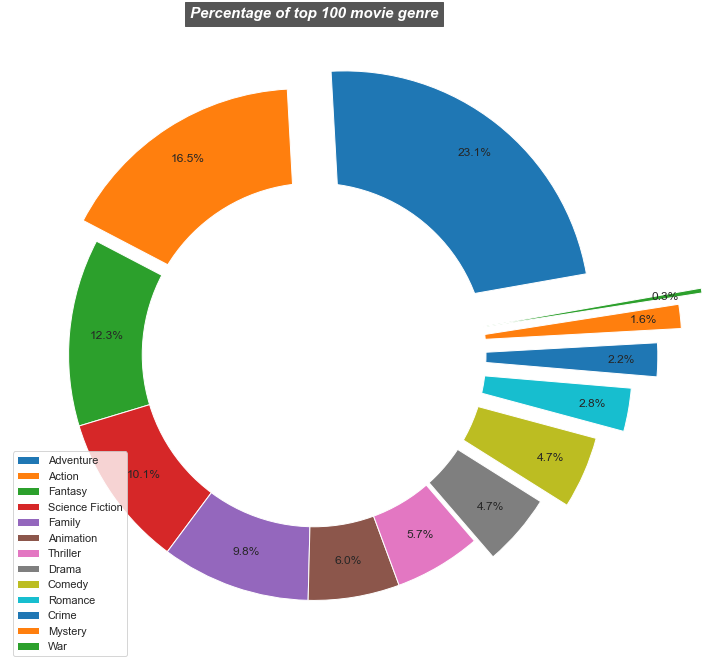

In [108]:
fig1, ax1 = plt.subplots(figsize=(11,25))
palette_color = sns.color_palette('tab10')


total = sum(b['movie_count'])
data_per = b['movie_count']/total*100
explode = (0.2, 0.1, 0, 0, 0, 0, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6)
ax1.pie(data_per, explode = explode,pctdistance=0.85,
    autopct='%1.1f%%', colors=palette_color,
    startangle=10,)
ax1.set_title('Percentage of top 100 movie genre',backgroundcolor ='#565656',
 fontsize=15, weight='bold',color='white',style='italic',loc='center',pad=30)



ax1.legend(loc=3, labels=b.genres)

circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

**Drama**, **Comedy** and **Thriller** are the three top genres with most movies over all, but in the list of top 100 top grossing movies these set of movie genres are no where to be found in the top 3 genres. The top 100 movie genres are larrgely dominated by **Adventure**, followed by **Action**, then **Fantasy**, with thriller, drama, and comedy coming in the 7th ,8th and 9th position respectively, in the top 100 highest grossing movies.

## Production Companies with most movies overtime

In [173]:
p_c = data(df['production_companies']).head(20).reset_index().rename(columns={'index':'production_company',
                                                                       0:'movie_count'})

p_c

,production_company,movie_count
0,Universal Pictures,327
1,Warner Bros.,324
2,Paramount Pictures,265
3,Twentieth Century Fox Film Corporation,201
4,Columbia Pictures,178
5,New Line Cinema,148
6,Touchstone Pictures,116
7,Walt Disney Pictures,116
8,Metro-Goldwyn-Mayer (MGM),109
9,Relativity Media,102


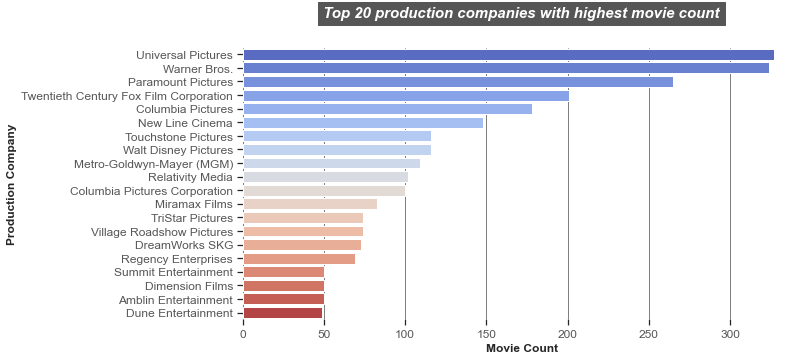

In [174]:
##Visualizing our result

fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='movie_count',y='production_company',data=p_c,ci=95,ax=ax,orientation='horizontal',
           order = p_c.sort_values('movie_count',  ascending = False).production_company, palette = 'coolwarm')
ax.set_title('Top 20 production companies with highest movie count',backgroundcolor ='#565656',
 fontsize=15, weight='bold',color='white',style='italic',loc='center',pad=30)


plt.box(False)
ax.xaxis.grid(linewidth=0.5,color='black')
ax.set_axisbelow(True)


ax.set_xlabel('Movie Count',weight='bold',size=12)
ax.set_ylabel('Production Company',weight='bold',size=12)


plt.xticks(rotation=0,color='#565656', size = 12)
plt.yticks(color='#565656', size = 12)

plt.show()


The Movie world seems to be largely dominated by **Universal Pictures**, **Warner Bros**, and **Paramount Pictures**, as they seem to have been involved in the production of more movies released.

## How movies are released monthly  vs How high grossing movies are released monthly

In [181]:
tm_100 = df['profit'].sort_values(ascending=False).reset_index(drop=True).head(100)

tm_100 = tm_100.unique()[99]

In [182]:
tm_100 = df[df['profit'] >= tm_100].sort_values('profit',
              ascending=False).reset_index(drop=True)

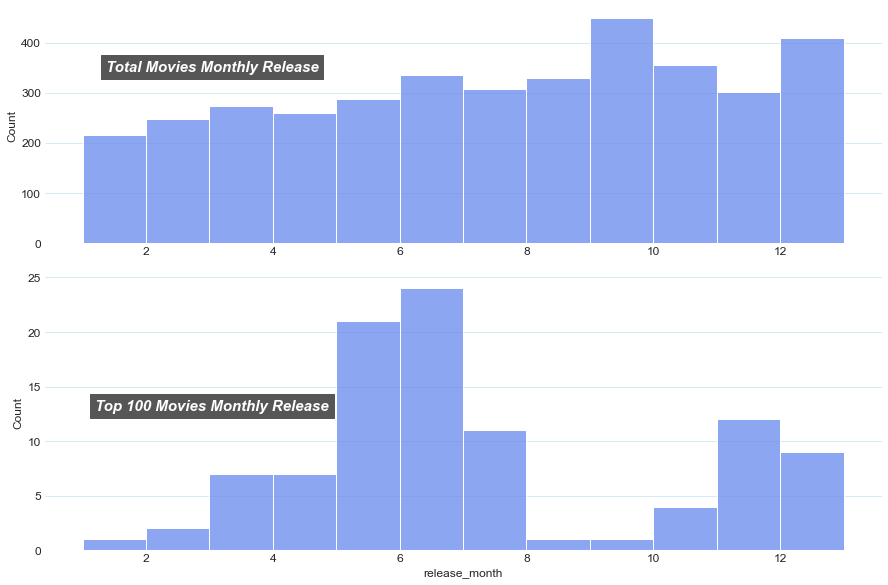

In [183]:
Grid_plot = plt.GridSpec(15, 6, wspace = 5.5,
                        hspace = 5)

fig,ax = plt.subplots(figsize=(15,10))

    
axes1 = plt.subplot(Grid_plot[:7,:])
sns.histplot(df['release_month'], bins=range(1, 14,),ax=axes1, palette='coolwarm')
axes1.set_title('Total Movies Monthly Release',backgroundcolor ='#565656',
 fontsize=15, weight='bold',color='white',style='italic',loc='center',pad=30, y=0.6, x=0.2)
sns.set(context='notebook', style='ticks',palette='coolwarm')
plt.box(False)
axes1.set_xlabel('')
axes1.tick_params(labelsize=12,length=0)
axes1.yaxis.grid(linewidth=0.5,color='lightblue')
ax.set_axisbelow(True)

#------------------------------------------------------------------------------------------------------------------------------#

axes2 = plt.subplot(Grid_plot[7:, :])
sns.histplot(tm_100['release_month'], bins=range(1, 14,),ax=axes2, palette='coolwarm')
axes2.set_title('Top 100 Movies Monthly Release',backgroundcolor ='#565656',
 fontsize=15, weight='bold',color='white',style='italic',loc='center',pad=30, y=0.4, x=0.2)
sns.set(context='notebook', style='ticks',palette='coolwarm')
plt.box(False)
axes2.tick_params(labelsize=12,length=0)
axes2.yaxis.grid(linewidth=0.5,color='lightblue')
axes2.set_axisbelow(True)

plt.show()

With the charts displayed above we can see that **9 (September)**, **12 (December)**, and **10 (October)** months, respectively have the highest number of movies released. But very surprisingly months with most released movies barely have any movie that falls under the top 100 grossing movie of all time.

We can see that most profitable movies are mostly released between the months **5 (May)** and **6 (June)**. While, september that has the heighest number of released movies, with over 400 movies in the month, Only one movie released in the month falls under the top 100 of most profitable movie.

### Insight into total number of movies, budget and profit in a year

#### The total count  for all movies released in a particular year

In [131]:
y_r = df['title'].groupby(df['release_year']).count().reset_index().sort_values('title',
        ascending=False).reset_index(drop=True).rename(columns={'title':'movie_count'})

####  The total profit  made by  movies in a particular year

In [132]:
y_p = df['profit'].groupby(df['release_year']).sum().reset_index().sort_values('profit',
        ascending=False).reset_index(drop=True)

#### The total budget  for all movies in a particular year

In [133]:
y_b = df['budget'].groupby(df['release_year']).sum().reset_index().sort_values('budget',
        ascending=False).reset_index(drop=True)

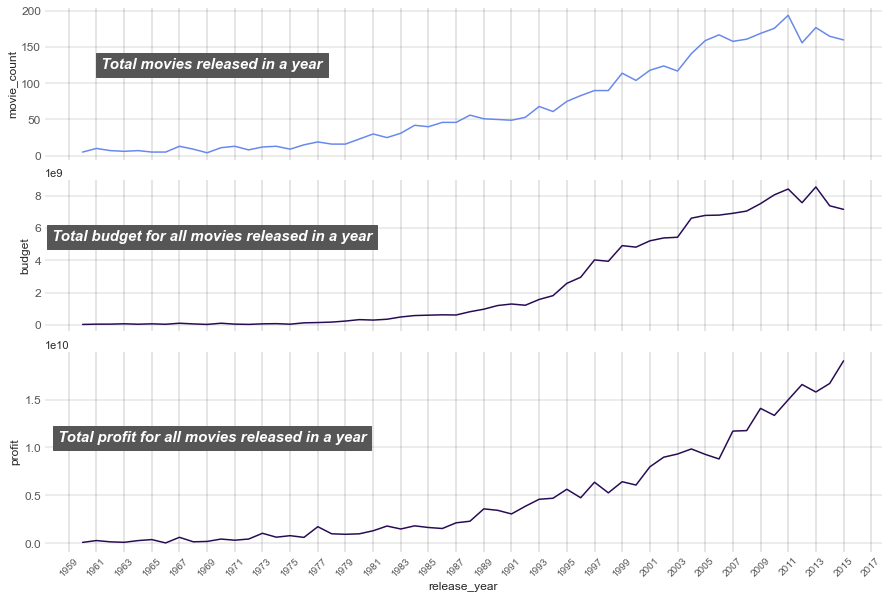

In [134]:
Grid_plot = plt.GridSpec(23, 6, wspace = 5.5,
                        hspace = 5)

fig,ax = plt.subplots(figsize=(15,10))

    
axes1 = plt.subplot(Grid_plot[:7,:])
sns.lineplot(x='release_year',y='movie_count',data=y_r,ci=95,ax=axes1,palette = 'coolwarm')
axes1.set_title('Total movies released in a year',backgroundcolor ='#565656',
fontsize=15, weight='bold',color='white',style='italic',loc='center',pad=30, y=0.4, x=0.2)
sns.set(context='notebook', style='ticks',palette='inferno')
plt.box(False)
axes1.tick_params(labelsize=12,length=0)
# add grid lines for y axis
axes1.yaxis.grid(linewidth=0.3,color='grey')
axes1.xaxis.grid(linewidth=0.4,color='grey')
# put the grid lines below bars
axes1.set_axisbelow(True)
axes1.set_xlabel('')
# turn off the x axis tick labels without disturbing the originals
[lbl.set_visible(False) for lbl in axes1.get_xticklabels()]



plt.xticks(rotation=45,color='#565656', size = 10)
plt.yticks(color='#565656', size = 12)

locator = mdates.DayLocator(interval=2)
axes1.xaxis.set_major_locator(locator)

#------------------------------------------------------------------------------------------------------------------------------#

axes2 = plt.subplot(Grid_plot[7:14, :])
sns.lineplot(x='release_year',y='budget',data=y_b,ci=95,ax=axes2,palette = 'coolwarm')
axes2.set_title('Total budget for all movies released in a year',backgroundcolor ='#565656',
fontsize=15, weight='bold',color='white',style='italic',loc='center',pad=30, y=0.4, x=0.2)
sns.set(context='notebook', style='ticks',palette='inferno')
plt.box(False)
axes2.tick_params(labelsize=12,length=0)
# add grid lines for y axis
axes2.yaxis.grid(linewidth=0.3,color='grey')
axes2.xaxis.grid(linewidth=0.4,color='grey')
# put the grid lines below bars
axes2.set_axisbelow(True)
# turn off the x axis tick labels without disturbing the originals
[lbl.set_visible(False) for lbl in axes2.get_xticklabels()]

axes2.set_xlabel('')

plt.xticks(rotation=45,color='#565656', size = 10)
plt.yticks(color='#565656', size = 12)

locator = mdates.DayLocator(interval=2)
axes2.xaxis.set_major_locator(locator)


#------------------------------------------------------------------------------------------------------------------------------#


axes3 = plt.subplot(Grid_plot[14:23, :])
sns.lineplot(x='release_year',y='profit',data=y_p,ci=95,ax=axes3,palette = 'coolwarm')
axes3.set_title('Total profit for all movies released in a year',backgroundcolor ='#565656',
fontsize=15, weight='bold',color='white',style='italic',loc='center',pad=30, y=0.4, x=0.2)
sns.set(context='notebook', style='ticks',palette='inferno')
plt.box(False)
axes3.tick_params(labelsize=12,length=0)
# add grid lines for y axis
axes3.yaxis.grid(linewidth=0.3,color='grey')
axes3.xaxis.grid(linewidth=0.4,color='grey')
# put the grid lines below bars
axes3.set_axisbelow(True)

plt.xticks(rotation=45,color='#565656', size = 10)
plt.yticks(color='#565656', size = 12)

locator = mdates.DayLocator(interval=2)
axes3.xaxis.set_major_locator(locator)

plt.show()

At this stage I made a line plot of the three important metrics; **Total number of movies released in a year**, **Total budget of all movies in a year**, **Total profit for all movies in a year**. We made this plot to help us in tracking out the trend accross every year and making comparisons, while answering questions and clearing misconceptions.

The year **2011** saw the highest number of movies released, but fell short in the highest budget for movies in a year. One would have imagined that since there was so much movies in 2011, then it should top yhe budget list too, but it came second.

**2013** was the year, with the highest total budget, slightly edging out the budget for the year 2011. 2013, did not have much movies released compared to 2011, but it had more budget for all movies.

For the year with most total profit, and it's definitely not 2013. The year 2014 and 2015, both had a drop in total released movies and total budget compared to the year that preceeds it, but that did not in any way affect their total profit, as 2015 and 2014, takes the first and second place respectively fo year with most total profit, having asteady increase from the year that preceeds it.

## Correlation Heatmap

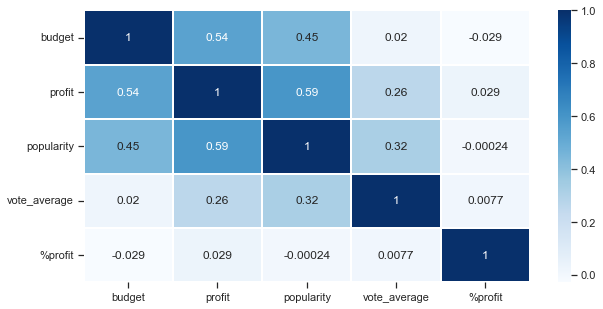

In [148]:
fig,ax = plt.subplots(figsize=(10,5))

sns.heatmap(df[['budget','profit','popularity', 
               'vote_average', '%profit']].corr(),annot = True, cmap = 'Blues', linewidth = 0.30,ax =ax)


plt.show()

**Correlation between Profit and Budget:
Correlation score: 0.54
Key Point: There seems to be a positive correlation between profit and budget, although not too strong, but above average, what this means is that, an increase in budget has a high tendency of having an increase in profit.**

**Correlation between Profit and Popularity:
Correlation score: 0.59
Key Point: There seems to be a positive correlation between profit and popularity, although not too strong, but above average, what this means is that, movies with high popularity, have a good tendency of having a high profit.**


**Note!!! from the heatmap we can deduce that percentage difference in profit is not correlated with any budget, popularity, the vote average and even profit too. What this means is that a high or low percentage difference in profits does not really depend on any of the following.  This is because there have been movies with low budget that has made good profit but there profit cant be compared to profit made by high budget movies.**

**So, in this case we use the percentage difference column to weigh out the movie profit based on the budget of the movie. So, a movie can have a high profit and the profit percentage difference is low compared to low budget movies.**

 <a id='conclusions'></a>

# Conclusion

**Curtain Closes!!!**

Wrangling, exploring and visualizing our data would be incomplete if our result fails to answer our questions, show key insights and hidden trends in our data, and provide useful informations and recommendations for movie lovers.

Although, our analysis was partially flawed by dropping over half of our dataset due to poor quality of the data presented, but that nevertheless affected the quality of the analytical proccess of this project. This was a major limitation in the course of this project. As having the complete dataset would definitely have created much difference in our data report, but at the same time not dropping the poor quality data at the point I did would have influenced our analytical process in a negative way and skew our data.

Having said all that, through this analytical process we were able to deduce the following and many more not listed below;

The Movie Avatar, directed by James Cameron in 2009, happens to be the most profitable movie within the timeframe, while it has the 10th highest budget for a movie released.

Only two movies in the top 10 budgets are in the top 10 highest grossing movies. Avatar(budget position:10th, profit position:1st), Avengers: Age of Ultron(budget position:3rd , profit position:8th).

Paranormal activity (with a budget of 15,000 and profit 193,340,800) and (The Blair Witch Project with a budget of 25,000 and profit of 247,975,000) are movies considered to be two of the most profitable movies ever based on their percentage profit difference.

The month of September has the highest number of movies released(449) but only on of those movies falls into the top 100 of highest grossing movies.

High grossing movies are mostly released between the month of May amd June, and they are dominated by Adventure and Action movie genres.

